In [1]:
from mesh import *

from my_types import *



2023-12-03 14:03:54.618100: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 14:03:54.645036: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 14:03:54.844115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 14:03:54.845307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 14:03:56.088256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported



[0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625]
starting
1.0
2.0
1.414213562373095
1.0
2.0
1.4142135623730951
1.0
2.0
1.414213562373095
1.0
2.0


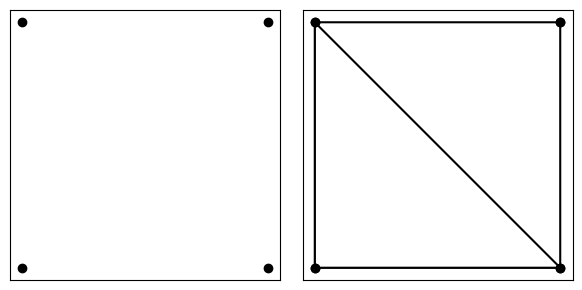

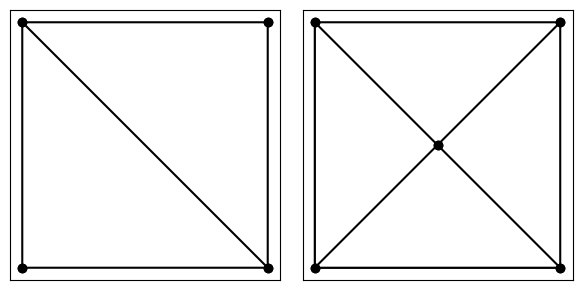

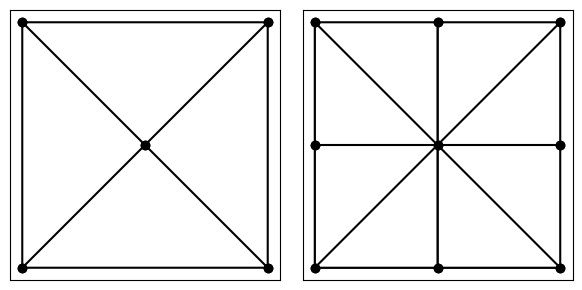

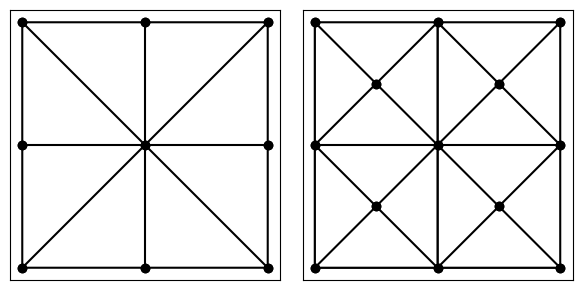

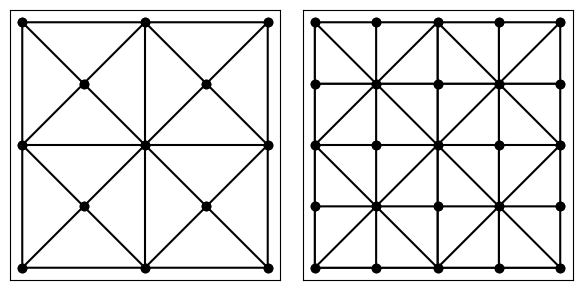

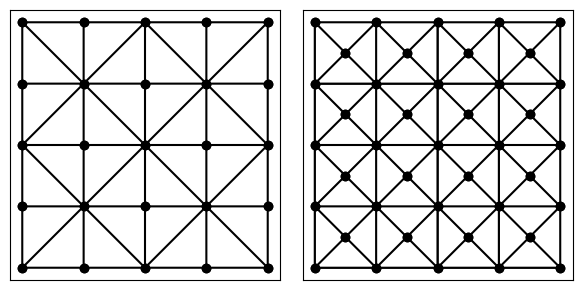

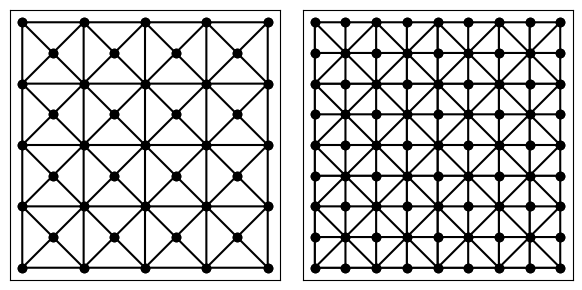

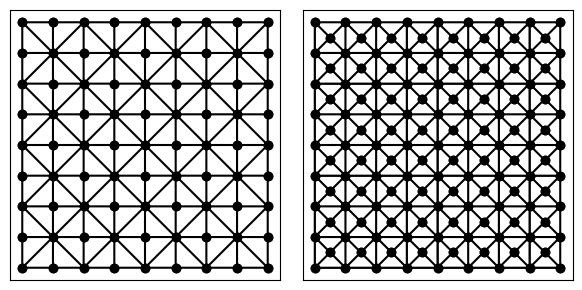

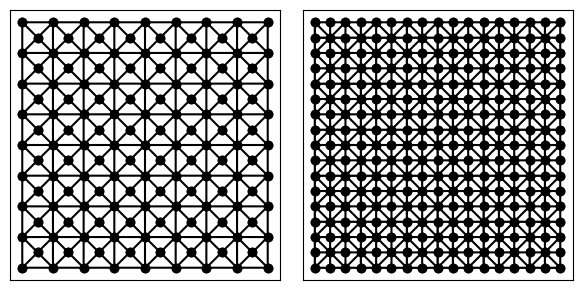

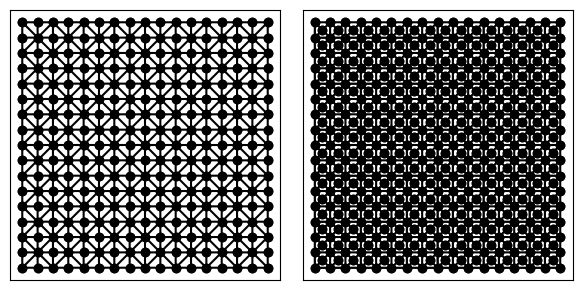

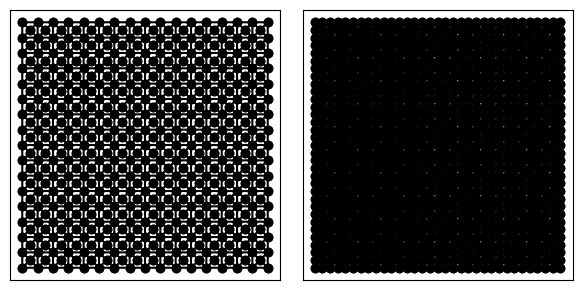

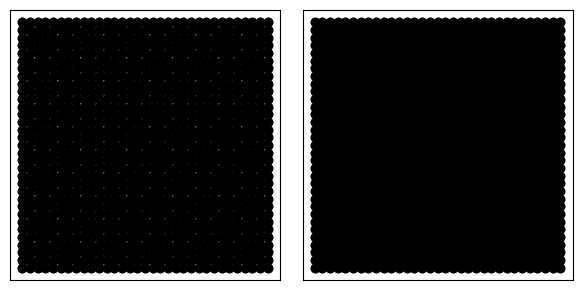

In [4]:
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
base_mesh = generate_mesh(domain,0.5)

mesh=base_mesh

refinement=[0.5/2**(i) for i in range(1,12)]
print(refinement)
dofs=[]


print('starting')
for i,r in enumerate(refinement):
    H=mesh['h']
    mesh=refine_mesh(mesh,r,True)
    h=mesh['h']
    print(H/h)

[0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625]
starting
1.0
2.0


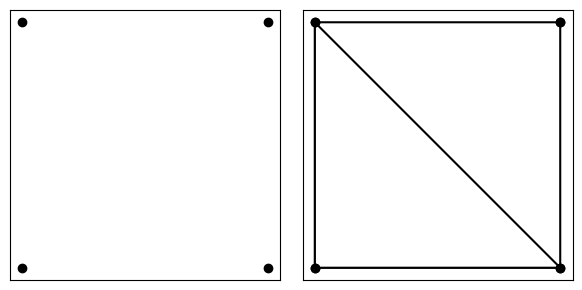

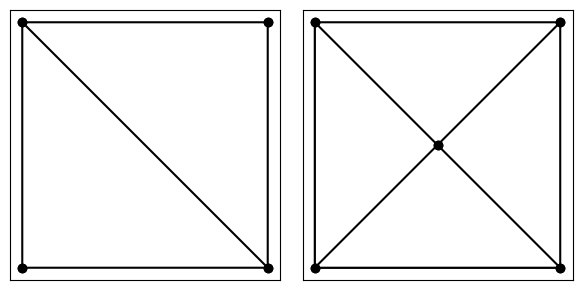

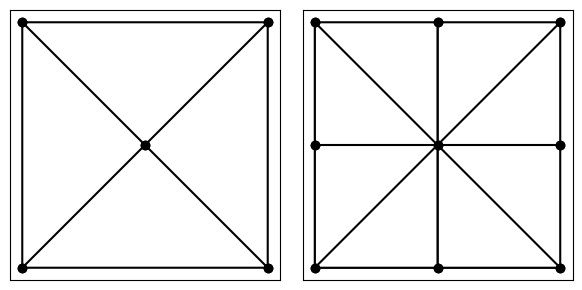

In [26]:
j=2
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
base_mesh = generate_mesh(domain,0.5)

mesh=base_mesh

refinement=[0.5/2**(i) for i in range(1,12)]
print(refinement)
dofs=[]


print('starting')
for i,r in enumerate(refinement):
    H=base_mesh['h']
    mesh=refine_mesh(mesh,r,True)
    h=mesh['h']
    print(H/h)
    if i==j-1:
        break
    base_mesh=mesh

In [27]:
def area(x1, y1, x2, y2, x3, y3):
 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)))



def isInside(point, triangle_vertices):
    x, y = point
    x1, y1 = triangle_vertices[0]
    x2, y2 = triangle_vertices[1]
    x3, y3 = triangle_vertices[2]

	# Calculate area of triangle ABC
    A = area(x1, y1, x2, y2, x3, y3)

	# Calculate area of triangle PBC 
    A1 = area(x, y, x2, y2, x3, y3)
	
	# Calculate area of triangle PAC 
    A2 = area(x1, y1, x, y, x3, y3)
	
	# Calculate area of triangle PAB 
    A3 = area(x1, y1, x2, y2, x, y)
	
	# Check if sum of A1, A2 and A3 
	# is same as A

    
    if np.isclose(A,A1+A2+A3,0.0000000001):
        return True 
    else:
        return False

In [28]:
triangles=[i for i in range(len(mesh['triangles']))]

N=len(base_mesh['triangles'])

zone=np.zeros((len(triangles),1))


for index in range(len(base_mesh['triangles'])):


    triangle_vertices=base_mesh['vertices'][base_mesh['triangles'][index]]



    counter=0

    for elem in reversed(triangles):
        center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
        if isInside(center,triangle_vertices)==True:
            zone[elem,0]=index
            triangles.remove(elem)
            counter=counter+1



In [29]:
print(triangles)

[]


[[0.66666667 0.16666667]
 [0.33333333 0.16666667]]


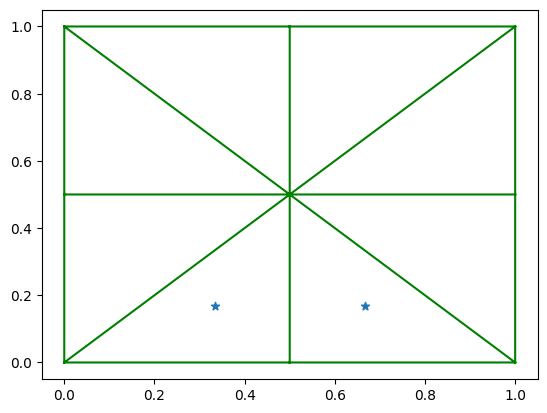

In [33]:
triangles=[i for i in range(len(mesh['triangles']))]

t=[]

for elem in triangles:
    center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
    if zone[elem]==3:
        t.append(center)

t=np.array(t)
print(t)

plt.triplot(mesh['vertices'][:,0],mesh['vertices'][:,1],mesh['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')